In [41]:
# Microbiome Specific Power Analysis - Using IBD - HMP2 - Cedars Sinai Cohort
# By: Ashok K. Sharma
# Date: 10-29-2024

In [52]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

import warnings
warnings.filterwarnings("ignore")

In [43]:
# Rscipt was used to process IBD datasets to compute Diversity
#Rscript ~Process_IBD_files.R

# Load the Diversity File: Diversity.csv
import pandas as pd
def load_data_from_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Data loaded successfully from {file_path}")
        return df
    except FileNotFoundError:
        print("File not found. Please check the file path.")
        return None

#file_path = "../data/CS_diversity.csv"  # Specify the file path here
file_path = "../data/Diversity.csv"  # Specify the file path here

df = load_data_from_csv(file_path)

Data loaded successfully from ../data/Diversity.csv


In [44]:
df

,Sample,Obs,Shannon,InvSimpson,Project,Patient,week_num,visit_num,site_name,Age,diagnosis,hbi,sccai,fecalcal,Group
0,CSM5FZ3N_P,75,2.566304,9.976153,G79889,C3001,0,4,Cedars-Sinai,28.0,CD,4.0,NaN,193.89,CDUC
1,CSM5FZ3R_P,107,2.397691,8.663442,G79894,C3001,2,5,Cedars-Sinai,28.0,CD,4.0,NaN,133.01,CDUC
2,CSM5FZ3T_P,43,2.248977,8.058431,G79914,C3002,0,4,Cedars-Sinai,47.0,CD,9.0,NaN,179.22,CDUC
3,CSM5FZ3V_P,99,2.426909,8.771115,G79913,C3001,6,7,Cedars-Sinai,28.0,CD,5.0,NaN,46.86,CDUC
4,CSM5FZ3X_P,73,2.318691,8.243487,G79929,C3002,2,5,Cedars-Sinai,47.0,CD,7.0,NaN,71.48,CDUC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,PSMB4MBS,129,2.786608,10.820095,G110702,P6037,33,21,MGH Pediatrics,15.0,CD,1.0,NaN,NaN,CDUC
1634,PSMB4MC1,134,2.789777,11.438235,G111932,P6038,34,22,MGH Pediatrics,8.0,UC,NaN,0.0,NaN,CDUC
1635,PSMB4MC3,114,2.577151,10.097963,G111934,P6038,35,23,MGH Pediatrics,8.0,UC,NaN,0.0,NaN,CDUC
1636,PSMB4MC5,97,2.941731,14.494684,G110704,P6038,37,25,MGH Pediatrics,8.0,UC,NaN,2.0,NaN,CDUC


In [45]:
print (df["site_name"].value_counts())
df['diagnosis'].value_counts ()

site_name
Cincinnati        482
MGH               451
Cedars-Sinai      413
MGH Pediatrics    229
Emory              63
Name: count, dtype: int64


diagnosis
CD        750
UC        459
nonIBD    429
Name: count, dtype: int64

count    246.000000
mean       2.851966
std        0.362292
min        0.000000
25%        2.633057
50%        2.887494
75%        3.114031
max        3.621051
Name: Shannon, dtype: float64


/var/folders/v1/8s3fdd1x24vgnk0vtys24rm80000gt/T/ipykernel_24276/2524832498.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([case_data, control_data], labels=['CD', 'Non-IBD'])


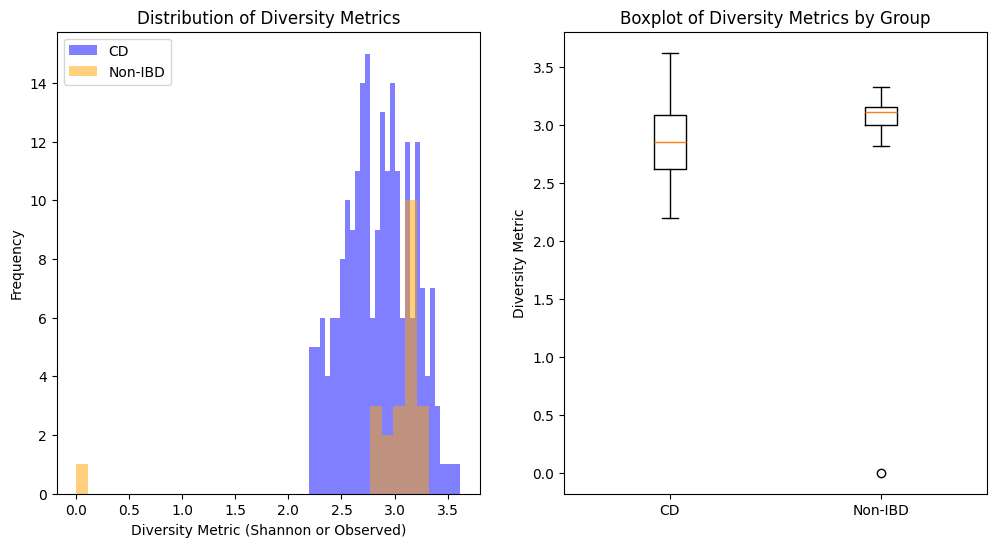

In [46]:
#######################
# Cedars Data
Cedars_data = df[df['site_name'] == 'Cedars-Sinai']
### If only want to consider CD Samples (NOT UC)
data = Cedars_data[Cedars_data['diagnosis'] != 'UC']

column_name = 'Shannon'  # Change to 'Observed' if needed
print(data[column_name].describe())
diversity_data = data[column_name]

# Split data into cases and controls
case_data = diversity_data[data['diagnosis'] == 'CD']
control_data = diversity_data[data['diagnosis'] == 'nonIBD']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(case_data, bins=30, alpha=0.5, label='CD', color='blue')
plt.hist(control_data, bins=30, alpha=0.5, label='Non-IBD', color='orange')
plt.xlabel('Diversity Metric (Shannon or Observed)')
plt.ylabel('Frequency')
plt.title('Distribution of Diversity Metrics')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot([case_data, control_data], labels=['CD', 'Non-IBD'])
plt.ylabel('Diversity Metric')
plt.title('Boxplot of Diversity Metrics by Group')
plt.show()

In [47]:
data["Patient"].value_counts()

Patient
C3027    24
C3017    23
C3022    22
C3016    20
C3001    16
C3002    15
C3010    14
C3012    14
C3008    13
C3028    12
C3023    12
C3035    12
C3009    12
C3031    11
C3030    10
C3021     9
C3007     3
C3024     1
C3020     1
C3033     1
C3019     1
Name: count, dtype: int64

Effect Size (absolute): 0.2120979922441441
equal group sizes detected (Case: 224, Control: 22). Using Equation B.
Z_alpha: 1.959963984540054, Z_beta: 0.0
Effect Size: 0.2120979922441441
Standard Deviation: 0.5148203115084942
Ratio: 10.181818181818182
Numerator: 11.384657099763997
Denominator: 0.4580347755606968
Z_alpha: 1.959963984540054, Z_beta: 0.12566134685507416
Effect Size: 0.2120979922441441
Standard Deviation: 0.5148203115084942
Ratio: 10.181818181818182
Numerator: 12.89128940828983
Denominator: 0.4580347755606968
Z_alpha: 1.959963984540054, Z_beta: 0.25334710313580006
Effect Size: 0.2120979922441441
Standard Deviation: 0.5148203115084942
Ratio: 10.181818181818182
Numerator: 14.518063501370513
Denominator: 0.4580347755606968
Z_alpha: 1.959963984540054, Z_beta: 0.385320466407568
Effect Size: 0.2120979922441441
Standard Deviation: 0.5148203115084942
Ratio: 10.181818181818182
Numerator: 16.3010215227716
Denominator: 0.4580347755606968
Z_alpha: 1.959963984540054, Z_beta: 0.524400512

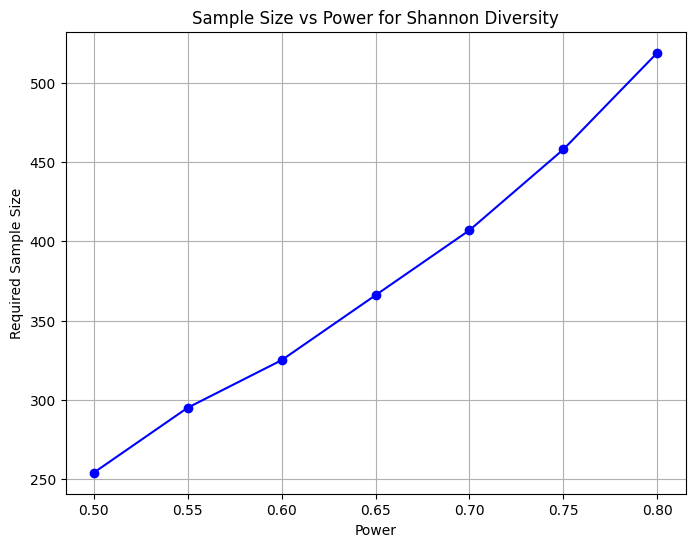

Power: 0.50, Sample Size: 254
Power: 0.55, Sample Size: 295
Power: 0.60, Sample Size: 325
Power: 0.65, Sample Size: 366
Power: 0.70, Sample Size: 407
Power: 0.75, Sample Size: 458
Power: 0.80, Sample Size: 519


In [48]:
#Comparison of two means in normally distributed continuous data (Extremely Important)
# Power calculation on Diversity Data

#######################
# Cedars Data
Cedars_data = df[df['site_name'] == 'Cedars-Sinai']
### If only want to consider CD Samples (NOT UC)
data = Cedars_data[Cedars_data['diagnosis'] != 'UC']
########################

# Select the column for diversity (either 'Observed' or 'Shannon')
column_name = 'Shannon'  # Change to 'Observed' if needed
diversity_data = data[column_name]

# Split data into cases and controls
case_data = diversity_data[data['diagnosis'] == 'CD']
control_data = diversity_data[data['diagnosis'] == 'nonIBD']

############################################## Functions ############################
# Function to calculate effect size
def calculate_effect_size(case_data, control_data):
    mean_diff = np.mean(case_data) - np.mean(control_data)
    pooled_std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)
    if pooled_std_dev == 0:
        return np.nan  # Avoid division by zero
    return mean_diff / pooled_std_dev

# Function to calculate sample size based on Equation A (equal group sizes)
def sample_size_equal_groups(effect_size, std_dev, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    # Print Z-scores to debug overflow issues
    print(f"Z_alpha: {Z_alpha}, Z_beta: {Z_beta}")

    # Check if Z_beta is too large, which might cause overflow
    if np.isnan(Z_beta) or Z_beta == np.inf:
        print("Z_beta is too large or resulted in NaN, skipping this power level.")
        return np.nan
        
    numerator = 2 * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = effect_size ** 2

    # Debugging print statements (after variables are defined)
    print(f"Effect Size: {effect_size}")
    print(f"Standard Deviation: {std_dev}")
    #print(f"Ratio: {ratio}") # There is no need to ratio in this formula because its a Equal Sample Size
    print(f"Numerator: {numerator}")
    print(f"Denominator: {denominator}")

    # Check if denominator is valid
    if denominator == 0 or np.isnan(denominator):
        print("Denominator is invalid (division by zero or NaN). Check the input values.")
        return np.nan  # Return NaN if denominator is invalid
    
    return int(np.ceil(numerator / denominator))

# Function to calculate sample size based on Equation B (unequal group sizes)
def sample_size_unequal_groups(effect_size, std_dev, ratio, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    
    # Print Z-scores to debug overflow issues
    print(f"Z_alpha: {Z_alpha}, Z_beta: {Z_beta}")
    
    # Check if Z_beta is too large, which might cause overflow
    if np.isnan(Z_beta) or Z_beta == np.inf:
        print("Z_beta is too large or resulted in NaN, skipping this power level.")
        return np.nan

    numerator = (ratio + 1) * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = ratio * effect_size ** 2
    
    # Debugging print statements (after variables are defined)
    print(f"Effect Size: {effect_size}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Ratio: {ratio}")
    print(f"Numerator: {numerator}")
    print(f"Denominator: {denominator}")
    
    # Check if denominator is valid
    if denominator == 0 or np.isnan(denominator):
        print("Denominator is invalid (division by zero or NaN). Check the input values.")
        return np.nan  # Return NaN if denominator is invalid
    
    n2 = int(np.ceil(numerator / denominator))  # Sample size of the smaller group
    n1 = int(ratio * n2)  # Sample size of the larger group
    return n1, n2
####################################

# Calculate effect size using diversity column
effect_size = calculate_effect_size(case_data, control_data)

# Use absolute value of effect size to avoid negative values
effect_size = abs(effect_size)

# Check if the effect size is valid
if np.isnan(effect_size):
    print("Invalid effect size (NaN). Check your data.")
else:
    print(f"Effect Size (absolute): {effect_size}")

# Assuming standard deviation is pooled between cases and controls
std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)

# Check if the groups are equal or unequal in size
n_case = len(case_data)
n_control = len(control_data)

if n_case == n_control:
    print("Equal group sizes detected. Using Equation A.")
    sample_size_func = sample_size_equal_groups
else:
    print(f"equal group sizes detected (Case: {n_case}, Control: {n_control}). Using Equation B.")
    ratio = max(n_case, n_control) / min(n_case, n_control)
    sample_size_func = lambda es, sd, alpha, power: sample_size_unequal_groups(es, sd, ratio, alpha, power)

# Define power levels and significance level
power_levels = np.arange(0.5, 0.8, 0.05)  # Power levels from 0.7 to 0.95
alpha = 0.05

# Calculate sample sizes for different power levels
sample_sizes = []
for power in power_levels:
    sample_size = sample_size_func(effect_size, std_dev, alpha, power)
    if isinstance(sample_size, tuple):
        sample_sizes.append(max(sample_size))  # Use the larger sample size when unequal
    elif np.isnan(sample_size):
        print(f"Sample size calculation failed for power: {power}")
        sample_sizes.append(np.nan)
    else:
        sample_sizes.append(sample_size)

# Plotting power vs. sample size
plt.figure(figsize=(8, 6))
plt.plot(power_levels, sample_sizes, marker='o', linestyle='-', color='b')
plt.title(f'Sample Size vs Power for {column_name} Diversity')
plt.xlabel('Power')
plt.ylabel('Required Sample Size')
plt.grid(True)
#plt.savefig('Type1_analysis.png', dpi=300, bbox_inches='tight')  # Change the file name and format as needed
plt.show()

# Print the results
for power, sample_size in zip(power_levels, sample_sizes):
    print(f"Power: {power:.2f}, Sample Size: {sample_size}")

Effect Size (absolute): 0.2120979922441441


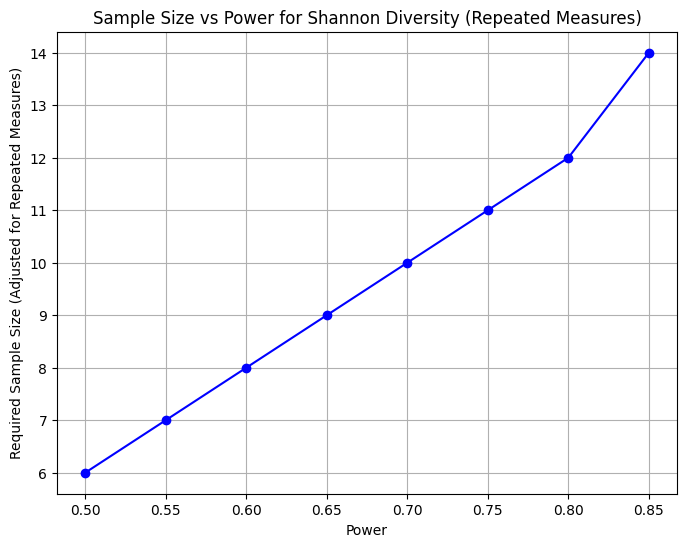

Power: 0.50, Adjusted Sample Size: 6
Power: 0.55, Adjusted Sample Size: 7
Power: 0.60, Adjusted Sample Size: 8
Power: 0.65, Adjusted Sample Size: 9
Power: 0.70, Adjusted Sample Size: 10
Power: 0.75, Adjusted Sample Size: 11
Power: 0.80, Adjusted Sample Size: 12
Power: 0.85, Adjusted Sample Size: 14


In [49]:
# Repeated Measures - longitudianl data Include ICC

#######################
# Cedars Data
Cedars_data = df[df['site_name'] == 'Cedars-Sinai']
### If only want to consider CD Samples (NOT UC)
data = Cedars_data[Cedars_data['diagnosis'] != 'UC']
########################

# Select the column for diversity (either 'Observed' or 'Shannon')
column_name = 'Shannon'  # Change to 'Observed' if needed
diversity_data = data[column_name]

# Split data into cases and controls
case_data = diversity_data[data['diagnosis'] == 'CD']
control_data = diversity_data[data['diagnosis'] == 'nonIBD']

# Split the time column for repeated measures
time = data['Patient']

############################################## Functions ############################
# Function to calculate effect size
def calculate_effect_size(case_data, control_data):
    mean_diff = np.mean(case_data) - np.mean(control_data)
    pooled_std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)
    if pooled_std_dev == 0:
        return np.nan  # Avoid division by zero
    return mean_diff / pooled_std_dev

# Function to calculate ICC (Intraclass Correlation Coefficient)
def calculate_icc(data, column_name, subject_column):
    model = MixedLM.from_formula(f"{column_name} ~ 1", groups=subject_column, data=data)
    fit = model.fit()
    random_effect_variance = fit.cov_re.iloc[0, 0]  # Variance of random effects
    residual_variance = fit.scale  # Variance of residuals
    total_variance = random_effect_variance + residual_variance
    icc_value = random_effect_variance / total_variance
    return icc_value

# Adjust for ICC in sample size calculation
def adjust_for_repeated_measures(sample_size, icc, num_timepoints):
    # Formula to adjust for ICC and repeated measures
    return sample_size / (1 + (num_timepoints - 1) * icc)

# Function to calculate sample size with ICC for equal group sizes
def sample_size_equal_groups_with_icc(effect_size, std_dev, icc, num_timepoints, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)

    numerator = 2 * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = effect_size ** 2

    # Calculate initial sample size without adjustment
    sample_size = int(np.ceil(numerator / denominator))
    
    # Adjust sample size for repeated measures using ICC
    adjusted_sample_size = adjust_for_repeated_measures(sample_size, icc, num_timepoints)
    
    return int(np.ceil(adjusted_sample_size))

####################################

# Calculate effect size using diversity column
effect_size = calculate_effect_size(case_data, control_data)

# Use absolute value of effect size to avoid negative values
effect_size = abs(effect_size)

# Check if the effect size is valid
if np.isnan(effect_size):
    print("Invalid effect size (NaN). Check your data.")
else:
    print(f"Effect Size (absolute): {effect_size}")

# Assuming standard deviation is pooled between cases and controls
std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)

# Define number of time points for repeated measures and ICC
num_timepoints = len(np.unique(time))

# Compute ICC based on the data
icc = calculate_icc(data, column_name, subject_column='Patient')

# Define power levels and significance level
power_levels = np.arange(0.5, 0.9, 0.05)  # Power levels from 0.5 to 0.9
alpha = 0.05

# Calculate sample sizes for different power levels, adjusting for repeated measures
sample_sizes = []
for power in power_levels:
    sample_size = sample_size_equal_groups_with_icc(effect_size, std_dev, icc, num_timepoints, alpha, power)
    if np.isnan(sample_size):
        print(f"Sample size calculation failed for power: {power}")
        sample_sizes.append(np.nan)
    else:
        sample_sizes.append(sample_size)

# Plotting power vs. sample size
plt.figure(figsize=(8, 6))
plt.plot(power_levels, sample_sizes, marker='o', linestyle='-', color='b')
plt.title(f'Sample Size vs Power for {column_name} Diversity (Repeated Measures)')
plt.xlabel('Power')
plt.ylabel('Required Sample Size (Adjusted for Repeated Measures)')
plt.grid(True)
#plt.savefig('Type1_anlysisICC.png', dpi=300, bbox_inches='tight')  # Change the file name and format as needed
plt.show()

# Print the results
for power, sample_size in zip(power_levels, sample_sizes):
    print(f"Power: {power:.2f}, Adjusted Sample Size: {sample_size}")

Effect Size (absolute): 0.2120979922441441
Calculated ICC: 0.34
Calculated Ratio: 10.18


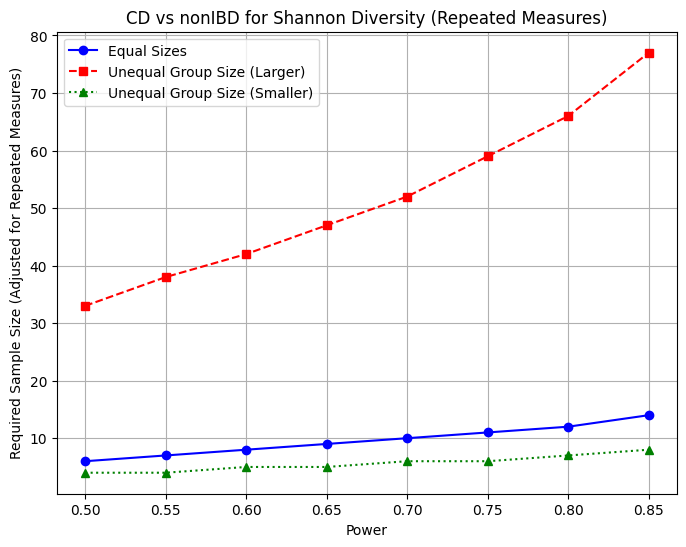

Power: 0.50, Adjusted Sample Size (Equal): 6, (Unequal): n1: 33, n2: 4
Power: 0.55, Adjusted Sample Size (Equal): 7, (Unequal): n1: 38, n2: 4
Power: 0.60, Adjusted Sample Size (Equal): 8, (Unequal): n1: 42, n2: 5
Power: 0.65, Adjusted Sample Size (Equal): 9, (Unequal): n1: 47, n2: 5
Power: 0.70, Adjusted Sample Size (Equal): 10, (Unequal): n1: 52, n2: 6
Power: 0.75, Adjusted Sample Size (Equal): 11, (Unequal): n1: 59, n2: 6
Power: 0.80, Adjusted Sample Size (Equal): 12, (Unequal): n1: 66, n2: 7
Power: 0.85, Adjusted Sample Size (Equal): 14, (Unequal): n1: 77, n2: 8


In [50]:
#Type1: Comparison of two means in normally distributed continuous data (Microbiome specific)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

#######################
# Cedars Data
Sel_data = df[df['site_name'] == 'Cedars-Sinai']
### If only want to consider CD Samples (NOT UC)
data = Sel_data[Sel_data['diagnosis'] != 'UC']
########################

# Select the column for diversity (either 'Observed' or 'Shannon')
column_name = 'Shannon'  # Change to 'Observed' if needed
diversity_data = data[column_name]

# Split data into cases and controls
case_data = diversity_data[data['diagnosis'] == 'CD']
control_data = diversity_data[data['diagnosis'] == 'nonIBD']

# Split the time column for repeated measures
time = data['Patient']

############################################## Functions ############################
# Function to calculate effect size
def calculate_effect_size(case_data, control_data):
    mean_diff = np.mean(case_data) - np.mean(control_data)
    pooled_std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)
    if pooled_std_dev == 0:
        return np.nan  # Avoid division by zero
    return mean_diff / pooled_std_dev

# Function to calculate ICC (Intraclass Correlation Coefficient)
def calculate_icc(data, column_name, subject_column):
    model = MixedLM.from_formula(f"{column_name} ~ 1", groups=subject_column, data=data)
    fit = model.fit()
    random_effect_variance = fit.cov_re.iloc[0, 0]  # Variance of random effects
    residual_variance = fit.scale  # Variance of residuals
    total_variance = random_effect_variance + residual_variance
    icc_value = random_effect_variance / total_variance
    return icc_value

# Adjust for ICC in sample size calculation
def adjust_for_repeated_measures(sample_size, icc, num_timepoints):
    # Formula to adjust for ICC and repeated measures
    return sample_size / (1 + (num_timepoints - 1) * icc)

# Function to calculate sample size with ICC for equal group sizes
def sample_size_equal_groups_with_icc(effect_size, std_dev, icc, num_timepoints, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)

    numerator = 2 * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = effect_size ** 2

    # Calculate initial sample size without adjustment
    sample_size = int(np.ceil(numerator / denominator))
    
    # Adjust sample size for repeated measures using ICC
    adjusted_sample_size = adjust_for_repeated_measures(sample_size, icc, num_timepoints)
    
    return int(np.ceil(adjusted_sample_size))

# Function to calculate sample size based on Equation B (unequal group sizes)
def sample_size_unequal_groups(effect_size, std_dev, ratio, icc, num_timepoints, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan, np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    
    # Check if Z_beta is too large, which might cause overflow
    if np.isnan(Z_beta) or Z_beta == np.inf:
        print("Z_beta is too large or resulted in NaN, skipping this power level.")
        return np.nan, np.nan
    
    numerator = (ratio + 1) * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = ratio * effect_size ** 2
    
    # Check if denominator is valid
    if denominator == 0 or np.isnan(denominator):
        print("Denominator is invalid (division by zero or NaN). Check the input values.")
        return np.nan, np.nan  # Return NaN if denominator is invalid
    
    n2 = int(np.ceil(numerator / denominator))  # Sample size of the smaller group
    n1 = int(ratio * n2)  # Sample size of the larger group
    
    # Adjust for repeated measures using ICC
    n1_adj = adjust_for_repeated_measures(n1, icc, num_timepoints)
    n2_adj = adjust_for_repeated_measures(n2, icc, num_timepoints)
    
    return int(np.ceil(n1_adj)), int(np.ceil(n2_adj))

####################################

# Calculate effect size using diversity column
effect_size = calculate_effect_size(case_data, control_data)

# Use absolute value of effect size to avoid negative values
effect_size = abs(effect_size)

# Check if the effect size is valid
if np.isnan(effect_size):
    print("Invalid effect size (NaN). Check your data.")
else:
    print(f"Effect Size (absolute): {effect_size}")

# Assuming standard deviation is pooled between cases and controls
std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)

# Define number of time points for repeated measures
num_timepoints = len(np.unique(time))

# Compute ICC based on the data
icc = calculate_icc(data, column_name, subject_column='Patient')

print(f"Calculated ICC: {icc:.2f}")

# Define power levels and significance level
power_levels = np.arange(0.5, 0.9, 0.05)  # Power levels from 0.5 to 0.9
alpha = 0.05

# Assuming a ratio for unequal groups (you can adjust this ratio)
ratio = len(case_data) / len(control_data) if len(control_data) > 0 else 1
print(f"Calculated Ratio: {ratio:.2f}")

# Calculate sample sizes for different power levels, adjusting for repeated measures
sample_sizes_equal = []
sample_sizes_unequal = []

for power in power_levels:
    # Equal group sizes calculation
    sample_size_equal = sample_size_equal_groups_with_icc(effect_size, std_dev, icc, num_timepoints, alpha, power)
    sample_sizes_equal.append(sample_size_equal)
    
    # Unequal group sizes calculation
    n1, n2 = sample_size_unequal_groups(effect_size, std_dev, ratio, icc, num_timepoints, alpha, power)
    sample_sizes_unequal.append((n1, n2))

# Plotting power vs. sample size
plt.figure(figsize=(8, 6))
plt.plot(power_levels, sample_sizes_equal, marker='o', linestyle='-', color='b', label='Equal Sizes')
plt.plot(power_levels, [n[0] for n in sample_sizes_unequal], marker='s', linestyle='--', color='r', label='Unequal Group Size (Larger)')
plt.plot(power_levels, [n[1] for n in sample_sizes_unequal], marker='^', linestyle=':', color='g', label='Unequal Group Size (Smaller)')
plt.title(f'CD vs nonIBD for {column_name} Diversity (Repeated Measures)')
plt.xlabel('Power')
plt.ylabel('Required Sample Size (Adjusted for Repeated Measures)')
plt.grid(True)
plt.legend()

# Save the figure
#plt.savefig('Type1_sampleSize_estimation_withICC.png', dpi=300, bbox_inches='tight')  # Change the file name and format as needed

plt.show()

# Print the results
for power, sample_size_equal, (n1, n2) in zip(power_levels, sample_sizes_equal, sample_sizes_unequal):
    print(f"Power: {power:.2f}, Adjusted Sample Size (Equal): {sample_size_equal}, (Unequal): n1: {n1}, n2: {n2}")


Mean in Cases: 2.84
Mean in Controls: 2.95


Enter the Shannon diversity cutoff:  2.9


Proportion P1 (Cases with high diversity): 0.44642857142857145
Proportion P2 (Controls with high diversity): 0.8181818181818182
Calculated ICC: 0.34
Calculated ratio: 10.18


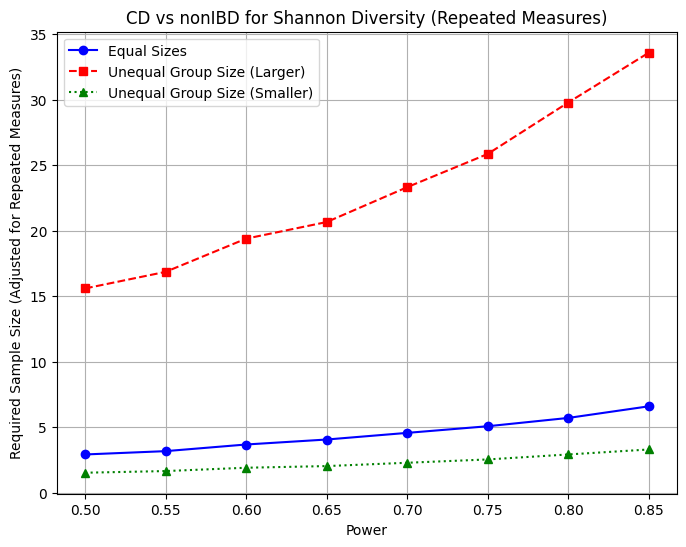

Power: 0.50, Sample Size (Equal, Adjusted): 2.9141296673453314, Sample Sizes (Unequal, Adjusted): n1: 15.584258655803293, n2: 1.5204154786149555
Power: 0.55, Sample Size (Equal, Adjusted): 3.1675322471144907, Sample Sizes (Unequal, Adjusted): n1: 16.851271554649088, n2: 1.6471167684995351
Power: 0.60, Sample Size (Equal, Adjusted): 3.674337406652809, Sample Sizes (Unequal, Adjusted): n1: 19.385297352340682, n2: 1.9005193482686944
Power: 0.65, Sample Size (Equal, Adjusted): 4.054441276306548, Sample Sizes (Unequal, Adjusted): n1: 20.652310251186478, n2: 2.027220638153274
Power: 0.70, Sample Size (Equal, Adjusted): 4.5612464358448666, Sample Sizes (Unequal, Adjusted): n1: 23.31303733876265, n2: 2.2806232179224333
Power: 0.75, Sample Size (Equal, Adjusted): 5.068051595383185, Sample Sizes (Unequal, Adjusted): n1: 25.847063136454242, n2: 2.5340257976915925
Power: 0.80, Sample Size (Equal, Adjusted): 5.701558044806083, Sample Sizes (Unequal, Adjusted): n1: 29.77480312287621, n2: 2.914129667

In [51]:
#Type2: Comparison of the difference in proportions between two groups (Microbiome Specific)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

#######################
# Cedars Data
Sel_data = df[df['site_name'] == 'Cedars-Sinai']
### If only want to consider CD Samples (NOT UC)
data = Sel_data[Sel_data['diagnosis'] != 'UC']
########################

# Select the column for diversity (either 'Observed' or 'Shannon')
column_name = 'Shannon'  # Change to 'Observed' if needed
diversity_data = data[column_name]

# Split data into cases and controls
case_data = diversity_data[data['diagnosis'] == 'CD']
control_data = diversity_data[data['diagnosis'] == 'nonIBD']

# Split the time column for repeated measures
time = data['Patient']

# Calculate means in both groups
P_case = np.mean(case_data)
P_control = np.mean(control_data)

print(f"\nMean in Cases: {P_case:.2f}")
print(f"Mean in Controls: {P_control:.2f}")

# Ask user for the Shannon diversity cutoff
shannon_cutoff = float(input("Enter the Shannon diversity cutoff: "))

# Calculate proportions based on cutoff
P1 = np.mean(case_data > shannon_cutoff)  # Proportion of cases above cutoff
P2 = np.mean(control_data > shannon_cutoff)  # Proportion of controls above cutoff

# Print the proportions
print(f"Proportion P1 (Cases with high diversity): {P1}")
print(f"Proportion P2 (Controls with high diversity): {P2}")

############################################## Functions ############################
# Function to calculate ICC (Intraclass Correlation Coefficient)
def calculate_icc(data, column_name, subject_column):
    model = MixedLM.from_formula(f"{column_name} ~ 1", groups=subject_column, data=data)
    fit = model.fit()
    random_effect_variance = fit.cov_re.iloc[0, 0]  # Variance of random effects
    residual_variance = fit.scale  # Variance of residuals
    total_variance = random_effect_variance + residual_variance
    icc_value = random_effect_variance / total_variance
    return icc_value

# Adjust for ICC in sample size calculation
def adjust_for_repeated_measures(sample_size, icc, num_timepoints):
    # Formula to adjust for ICC and repeated measures
    return sample_size / (1 + (num_timepoints - 1) * icc)

# Function to calculate sample size for equal proportions
def sample_size_equal_proportions(P1, P2, alpha=0.05, power=0.8):
    Z_alpha = norm.ppf(1 - alpha / 2)
    Z_beta = norm.ppf(power)
    numerator = 2 * (Z_alpha + Z_beta) ** 2 * (P1 * (1 - P1) + P2 * (1 - P2))
    denominator = (P1 - P2) ** 2
    return int(np.ceil(numerator / denominator)) if denominator > 0 else np.nan

# Function to calculate sample size for unequal group sizes
def sample_size_unequal_proportions(P1, P2, ratio, alpha=0.05, power=0.8):
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    numerator = (Z_alpha + Z_beta) ** 2 * (P1 * (1 - P1) + P2 * (1 - P2))
    denominator = (P1 - P2) ** 2
    
    if denominator == 0 or np.isnan(denominator):
        return np.nan  # Avoid division by zero
    
    n2 = int(np.ceil(numerator / denominator))  # Sample size of smaller group
    n1 = int(np.ceil(ratio * n2))  # Sample size of larger group
    return n1, n2

#################################### Main Analysis ##############################
# Check if proportions are valid
if P1 == P2:
    print("Proportions are equal, unable to calculate sample sizes.")
else:
    # Calculate ICC based on the data
    icc = calculate_icc(data, column_name, subject_column='Patient')
    print(f"Calculated ICC: {icc:.2f}")

    # Define power levels and significance level
    power_levels = np.arange(0.5, 0.9, 0.05)  # Power levels from 0.5 to 0.9
    alpha = 0.05

    # Calculate ratio for unequal groups
    ratio = len(case_data) / len(control_data) if len(control_data) > 0 else 1
    print(f"Calculated ratio: {ratio:.2f}")

    # Calculate sample sizes for different power levels
    sample_sizes_equal = []
    sample_sizes_unequal = []

    for power in power_levels:
        # Calculate sample size for equal proportions
        sample_size_eq = sample_size_equal_proportions(P1, P2, alpha, power)
        sample_sizes_equal.append(adjust_for_repeated_measures(sample_size_eq, icc, len(np.unique(time))))
        
        # Calculate sample size for unequal proportions
        n1, n2 = sample_size_unequal_proportions(P1, P2, ratio, alpha, power)
        sample_sizes_unequal.append((adjust_for_repeated_measures(n1, icc, len(np.unique(time))),
                                       adjust_for_repeated_measures(n2, icc, len(np.unique(time)))))

    # Plotting power vs. sample size
    plt.figure(figsize=(8, 6))
    plt.plot(power_levels, sample_sizes_equal, marker='o', linestyle='-', color='b', label='Equal Sizes')
    plt.plot(power_levels, [n[0] for n in sample_sizes_unequal], marker='s', linestyle='--', color='r', label='Unequal Group Size (Larger)')
    plt.plot(power_levels, [n[1] for n in sample_sizes_unequal], marker='^', linestyle=':', color='g', label='Unequal Group Size (Smaller)')
    plt.title(f'CD vs nonIBD for {column_name} Diversity (Repeated Measures)')
    plt.xlabel('Power')
    plt.ylabel('Required Sample Size (Adjusted for Repeated Measures)')
    plt.grid(True)
    plt.legend()

    # Save the figure
    #plt.savefig('Type2_sampleSize_estimation_withICC.png', dpi=300, bbox_inches='tight')  # Change the file name and format as needed

    plt.show()

    # Print the results
    for power, sample_size_eq, (n1, n2) in zip(power_levels, sample_sizes_equal, sample_sizes_unequal):
        print(f"Power: {power:.2f}, Sample Size (Equal, Adjusted): {sample_size_eq}, Sample Sizes (Unequal, Adjusted): n1: {n1}, n2: {n2}")